In [2]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import pathlib
from sklearn.externals import joblib

import datetime
import scipy.fftpack as fftp
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def create_drive(zdata, dt2, tf, freqs):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    driver = np.fft.ifft(tf(freq2)*fbottom2)
    return driver

def fit_cancel(array, n=1):
    t=linspace(0,len(array),len(array))
    fit = polyfit(t,array,n)
    corrective = fit[n]*ones(shape(t))
    for j in arange(n):
        corrective += fit[j]*(t**(n-j))
    return array - corrective

def lpfilter(array,n):
    return repeat(mean(array.reshape(-1,n),axis=1),n)

In [5]:
# folder_name='Albert_Data/2019-02-21-v2/'
# file_nme='fast-transfer-function-'
# i=0
# j = 1+i*100
# dat = loadtxt(folder_name+file_nme+str(j).zfill(3)+'.dat',skiprows=6)
# for j in arange(2+i*100,i*100+100):
#     dat=concatenate((dat,loadtxt(folder_name+file_nme+str(j).zfill(3)+'.dat',skiprows=6)))
# nc=cancel.Cancel(fit_cancel(dat[:,0]),fit_cancel(dat[:,1]),1/10000,[200000,50000,5])

In [8]:
folder_name='Albert_Data/2019-02-21/'
file_name='fast-transfer-function-'


dat=np.loadtxt(folder_name+file_name+"001.dat",skiprows = 6)

for j in arange(2,1000):
    file = folder_name+file_name+str(j).zfill(3)+'.dat'
    try:
#         temp_dat = stmpy.load(folder_loc+file)
        temp_dat = np.loadtxt(file, skiprows=6)
        dat = np.concatenate((dat,temp_dat))
        print(j,end='\r')
    except:
        pass
nc=cancel.Cancel(fit_cancel(dat[:,0]),fit_cancel(dat[:,1]),1/10000,p=[200000,50000,5])

In [9]:
shape(dat)

(24956600, 2)

In [14]:
# for i in arange(1,10):
#     print(i)
#     j = 1+i*100
#     dat = loadtxt(folder_name+file_nme+str(j).zfill(3)+'.dat',skiprows=6)
#     for j in arange(2+i*100,i*100+100):
#         dat=concatenate((dat,loadtxt(folder_name+file_nme+str(j).zfill(3)+'.dat',skiprows=6)))
#     nc.update_transf(fit_cancel(dat[:,0]),fit_cancel(dat[:,1]),1/10000,[200000,50000,5])

C:\Users\jgoet\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(0.0281170803181244, 300)

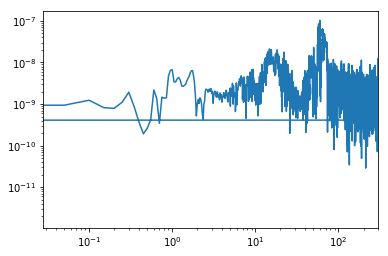

In [10]:
loglog(nc.freqs,abs(nc.transf(nc.freqs)))
xlim(0,300)

In [12]:
# loglog(nc.freqs,abs(nc.transf(nc.freqs)))
# xlim(0,300)

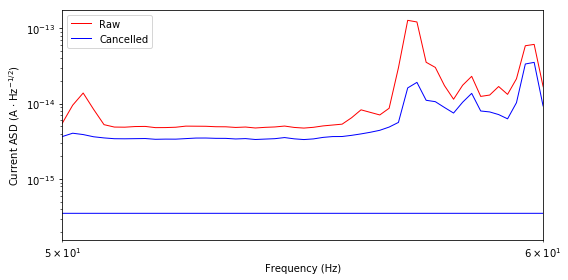

In [24]:
from scipy import signal

end=300000

trace.i = dat[:,1]
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

figure(figsize=[8,4])
loglog(trace.w2, sqrt(trace.psd), 'r-', lw=1, label='Raw')

trace.i = dat[:,1]-nc.create_drive(fit_cancel(dat[:,0]))
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

loglog(trace.w2, sqrt(trace.psd), 'b-', lw=1, label='Cancelled')
legend()
# xlim(trace.w[0], trace.w[-1])
xlim(50,60)
# ylim(1e-17,1e-12)
xlabel('Frequency (Hz)')
ylabel('Current ASD (A $\cdot$ Hz$^{-1/2}$)')
tight_layout()

C:\Users\jgoet\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


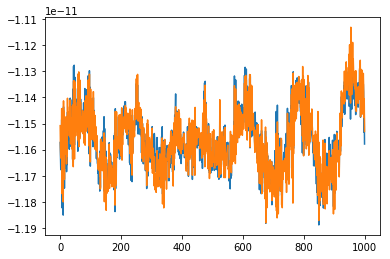

In [15]:
start = 100000
end = 101000
plot(dat[start:end,1])
plot(dat[start:end,1]-nc.create_drive(fit_cancel(dat[start:end,0])))

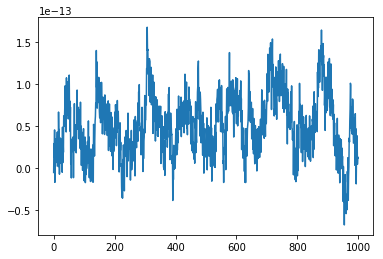

In [16]:
plot(nc.create_drive(dat[start:end,0]))

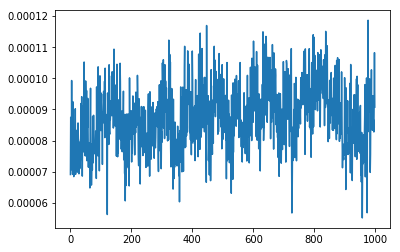

In [17]:
plot(dat[start:end,0])

In [19]:
# test=loadtxt(folder_name+'bias-spectroscopy-140.dat',skiprows=6)
# shape(test)

In [20]:
# plot(test[:,-1])

In [21]:
# plot(nc.create_drive(fit_cancel(test[:,2])))

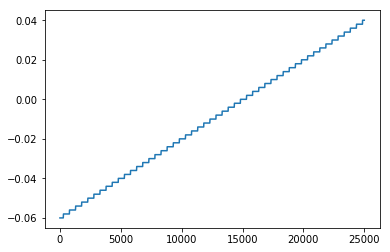

In [28]:
plot(test[:,3])

In [48]:
# log fitting
z_spec=loadtxt(folder_name+'Z-Spectroscopy002.dat',skiprows=49)
fit = polyfit(z_spec[:,0],log(abs(z_spec[:,1])),1)

z_noise=create_drive(fit_cancel(test[:,2]),1/10000,nc.transf,nc.freqs)
cur_noise=exp(-(z_noise-mean(z_noise))*fit[0]*20)

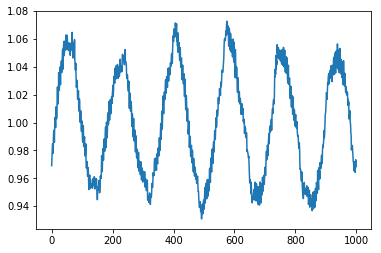

In [52]:
end2=1000
plot(cur_noise[:end2])

C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


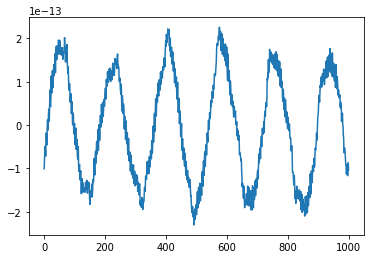

In [65]:
plot(z_noise[:end2])

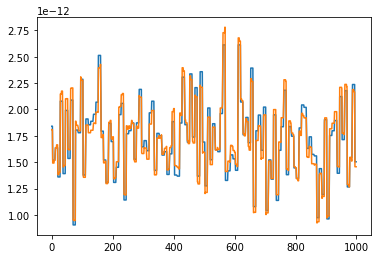

In [64]:
plot(test[:end2,-1])
plot(test[:end2,-1]*lpfilter(cur_noise[:end2],8))

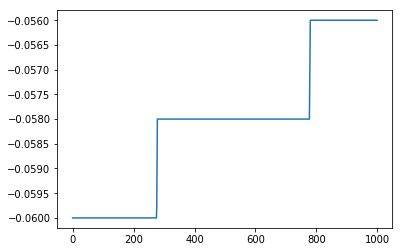

In [63]:
plot(test[:end2,3])

C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


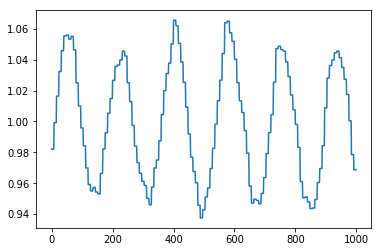

In [62]:
plot(lpfilter(cur_noise[:end2],8))

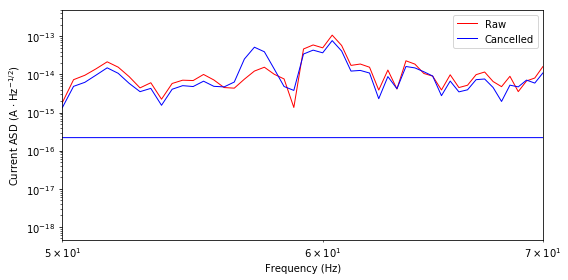

In [70]:
from scipy import signal

end=300000

trace.i = test[:,-1]
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

figure(figsize=[8,4])
loglog(trace.w2, sqrt(trace.psd), 'r-', lw=1, label='Raw')

trace.i = test[:,-1]/lpfilter(cur_noise[:],8)
trace.t = arange(200000)/10000

trace.w = stmpy.tools.fftfreq(len(trace.i), trace.t[-1])
trace.w2, trace.psd = signal.welch(trace.i, 10000, nperseg=50000)

loglog(trace.w2, sqrt(trace.psd), 'b-', lw=1, label='Cancelled')
legend()
# xlim(trace.w[0], trace.w[-1])
xlim(50,70)
# ylim(1e-17,1e-12)
xlabel('Frequency (Hz)')
ylabel('Current ASD (A $\cdot$ Hz$^{-1/2}$)')
tight_layout()